# Trabalho de algoritmos para Ciência de dados
    
    Nesse trabalho foi proposto realizar um relatorio de um call-center, realizando uma relação entre as regras de associação do algoritmo apriori e os clusters do algoritmo kmeans.
    
   *» Idade: Idade do devedor;*
   
   *» Atraso: Quantidade de dias de Atraso;*
   
   *» Valor: Valor do débito em atraso;*
   
   *» Contato: Se houve contato pela central;*
   
   *» Efetivo: quantidade de contatos efetivados pela central;*
   
   *» Acordo: se foi fechado o acordo de pagamento ou não, atributo objetivo da análise.*
    
    
   **Codificação para as faixas etárias dos clientes devedores:**
    
    • Código 0: De 0 a 25 anos;
    • Código 1: De 26 a 35 anos;
    • Código 2: De 36 a 45 anos;
    • Código 4: Maior que 45 anos.
    
   **Codificação para as faixas de valores das dívidas:**
    
    • Código 0: De 0 a 200 reais;
    • Código 1: De 200 a 500 reais;
    • Código 2: De 500 a 1000 reais;
    • Código 5: Maior que 1000 reais.

   **Codificação para as faixas de tempo de atraso:**
    
    • Código 0: De 0 a 15 dias;
    • Código 1: De 15 a 30 dias;
    • Código 2: De 31 a 120 dias;
    • Código 6: acima de 120 dias.

# Importação dos pacotes

In [33]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math

In [2]:
df = pd.read_csv('C:/Users/joaob/OneDrive/Documentos/2 semestre/algoritmos_ciencia_de_dados/A4 (1).csv')

In [3]:
#Visualização do modelo de dado
df.head()

,Idade,Atraso,Valor,CONTATO,EFETIVO,Acordo
0,4,0,5,17,2,0
1,1,6,1,10,1,1
2,0,0,2,22,1,1
3,4,1,2,8,1,1
4,2,6,0,13,1,1


# Função que calcula os erros quadrados (calcula_wcss)

In [4]:
def calcula_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters = n)
        kmeans.fit (df)
        wcss.append(kmeans.inertia_)
        
    return wcss

In [5]:
calcula_wcss(df)

[63732.86668138604,
 44932.75674247839,
 37415.99545147151,
 33172.385256262634,
 29477.763197426302,
 26339.12029354752,
 23559.64699206839,
 22246.830585001724,
 19938.23256266034,
 18699.596980607916,
 17433.572457419607,
 16482.89959478718,
 15807.267197684583,
 15018.353013440199,
 14615.273571085945,
 14192.121440103654,
 13608.794437789413,
 13149.647545383912,
 12742.138650913303]

# Gráfico dos erros 

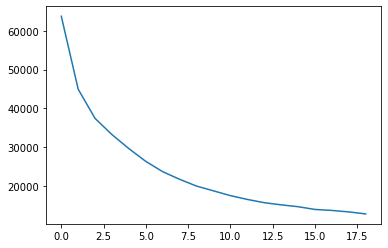

In [6]:
plt.plot(calcula_wcss(df))
plt.show()

# função que calcula o numero de cluster ideal

In [7]:
def numero_cluster(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]
    
    distancia = []
    for i in range(len(wcss)):
        x0 = i + 2
        y0 = wcss[i]
        numerador = abs((y2-y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancia.append(numerador/denominador)
        
    return distancia.index(max(distancia)) + 2

In [8]:
soma_quadrada=calcula_wcss(df)

n = numero_cluster(soma_quadrada)

kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(df)

In [9]:
clusters

array([3, 2, 3, ..., 6, 5, 5])

# Número de cluster ideal

    Resultado de número ideal de cluster: 
    
   # K = 7

In [56]:
print(kmeans)

KMeans(n_clusters=7)


# Gráfico de cluster 
    
    Esse gráfico foi gerado no weka, com 7 cluster em que ele separa o cluster numero 5 como o único grupo que não fecha acordo

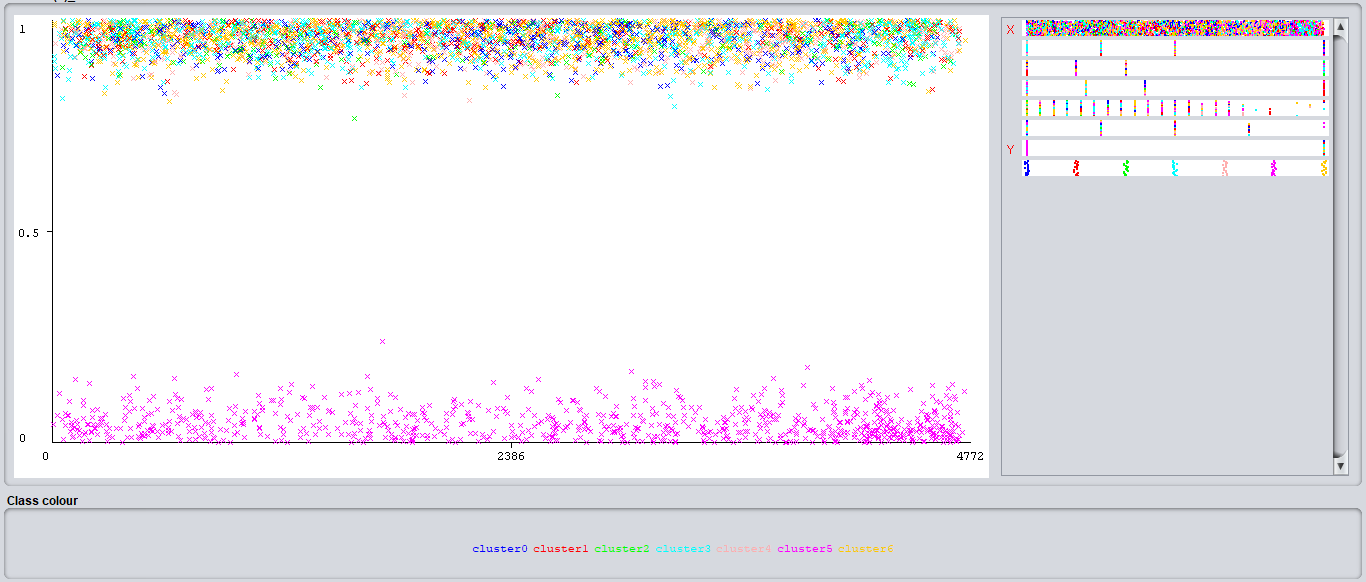

   **Como podemos ver na figura do weka o cluster 5 tem zero de acordo como zero sendo um dado booleano para false, é o grupo que  não faz acordo.**

# caracteristicas do grupo 5

**Quantidade** = 867 pessoas

**Idade** = 25 - 35 anos 

**Atraso** = 31 - 120 dias

**Valor** = 500 - 1.000 reais

**Com apenas contato 1 efetivo, nenhum acordo** 

**o valor da idade é 1.9146, isso indica que nesse grupo estão as pessoas com idade mais proximas da maxima do grupo que é 35 anos, já as do grupo 3, que é um grupo muito semelhante com o grupo 5, mais acabam fechando acordo são de idade mais proximas do minimo, e com dividas menores.**

# Caracteristicas do grupo 3

**Quantidade** = 869 pessoas

**Idade** = 25 - 35 anos 

**Atraso** = Acima de 120 dias

**Valor** = 0 - 200 reais


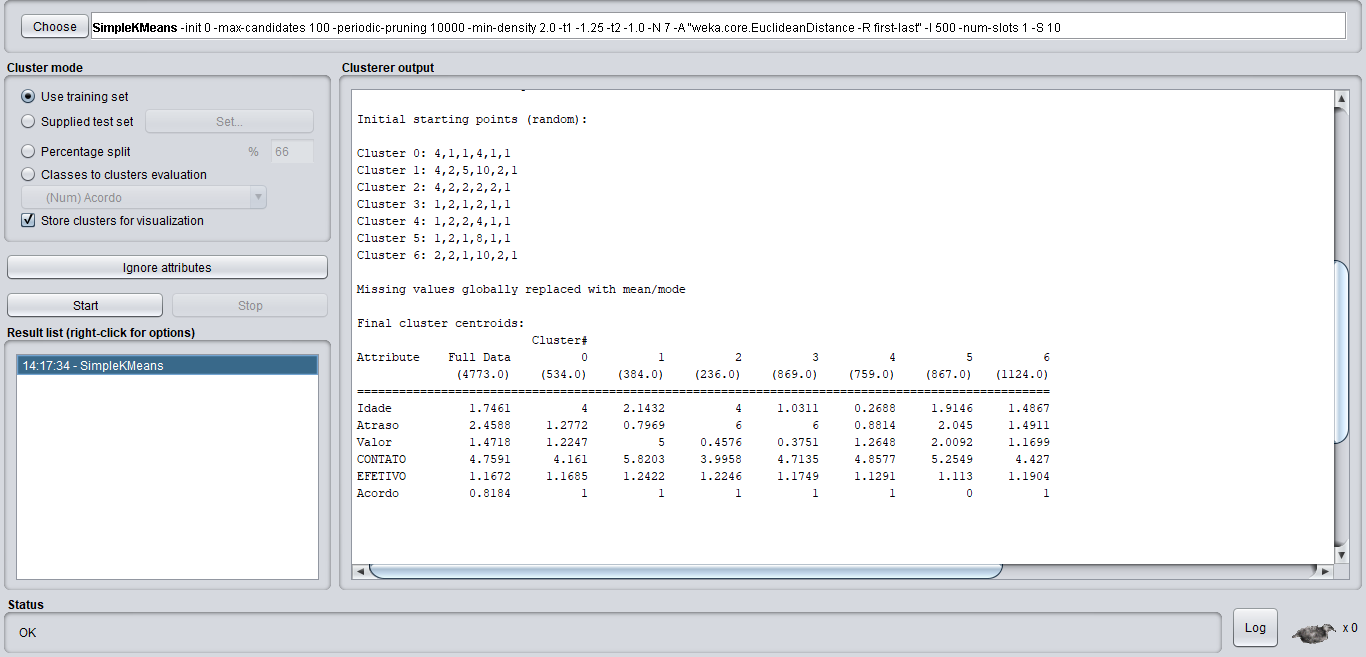

**É de grande valia que poderiam priorizar as pessoas acima de 45, que mesmo com as o valor da divida baixa é com pouco tempo de atraso, optam por realizar o acordo.**

# Regras de Associação com o APRIORI

**Foram as 3 regas, nelas podemos ver que o fator principal foram os contatos, temos s regra 2 que mostra que quem se teve contato efetivo, foram feitos os acordos**


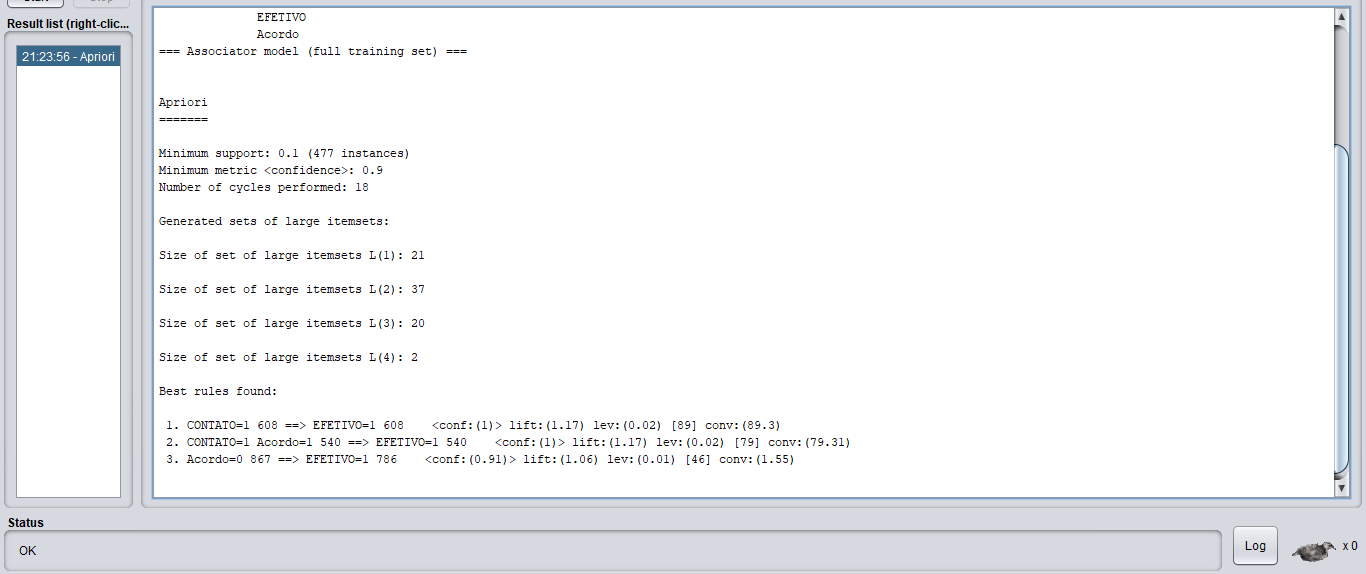